# Esercitazione 5

## Esercizio 1 - Formati e dimensione immagini

### a.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image
im = Image.open('../../files/img-serie-5/buildings.tiff', 'r')
plt.figure(figsize=(30,60), dpi=100)
columns = 2

qualities = np.array([1, 5, 10, 20, 50, 60, 75, 90, 95, 99])

for idx, val in enumerate(qualities):
    bio = BytesIO()
    im.save(bio, 'jpeg', quality=int(val))
    fsize = int(bio.getbuffer().nbytes / 1024)
    jpeg_img = Image.open(bio)
    plt.subplot(len(qualities) / columns + 1, columns, idx + 1)
    plt.title(f"Quality: {val} - {fsize} kB")
    plt.imshow(np.asarray(jpeg_img))

Possiamo chiaramente notare come, a qualità più basse, corrisponde una più bassa presenza di colori. Fino ad una qualità del $20\%$ possiamo infatti notare come il cielo presenta una sfumatura a scaletta anziché essere uniforme. 

### b.

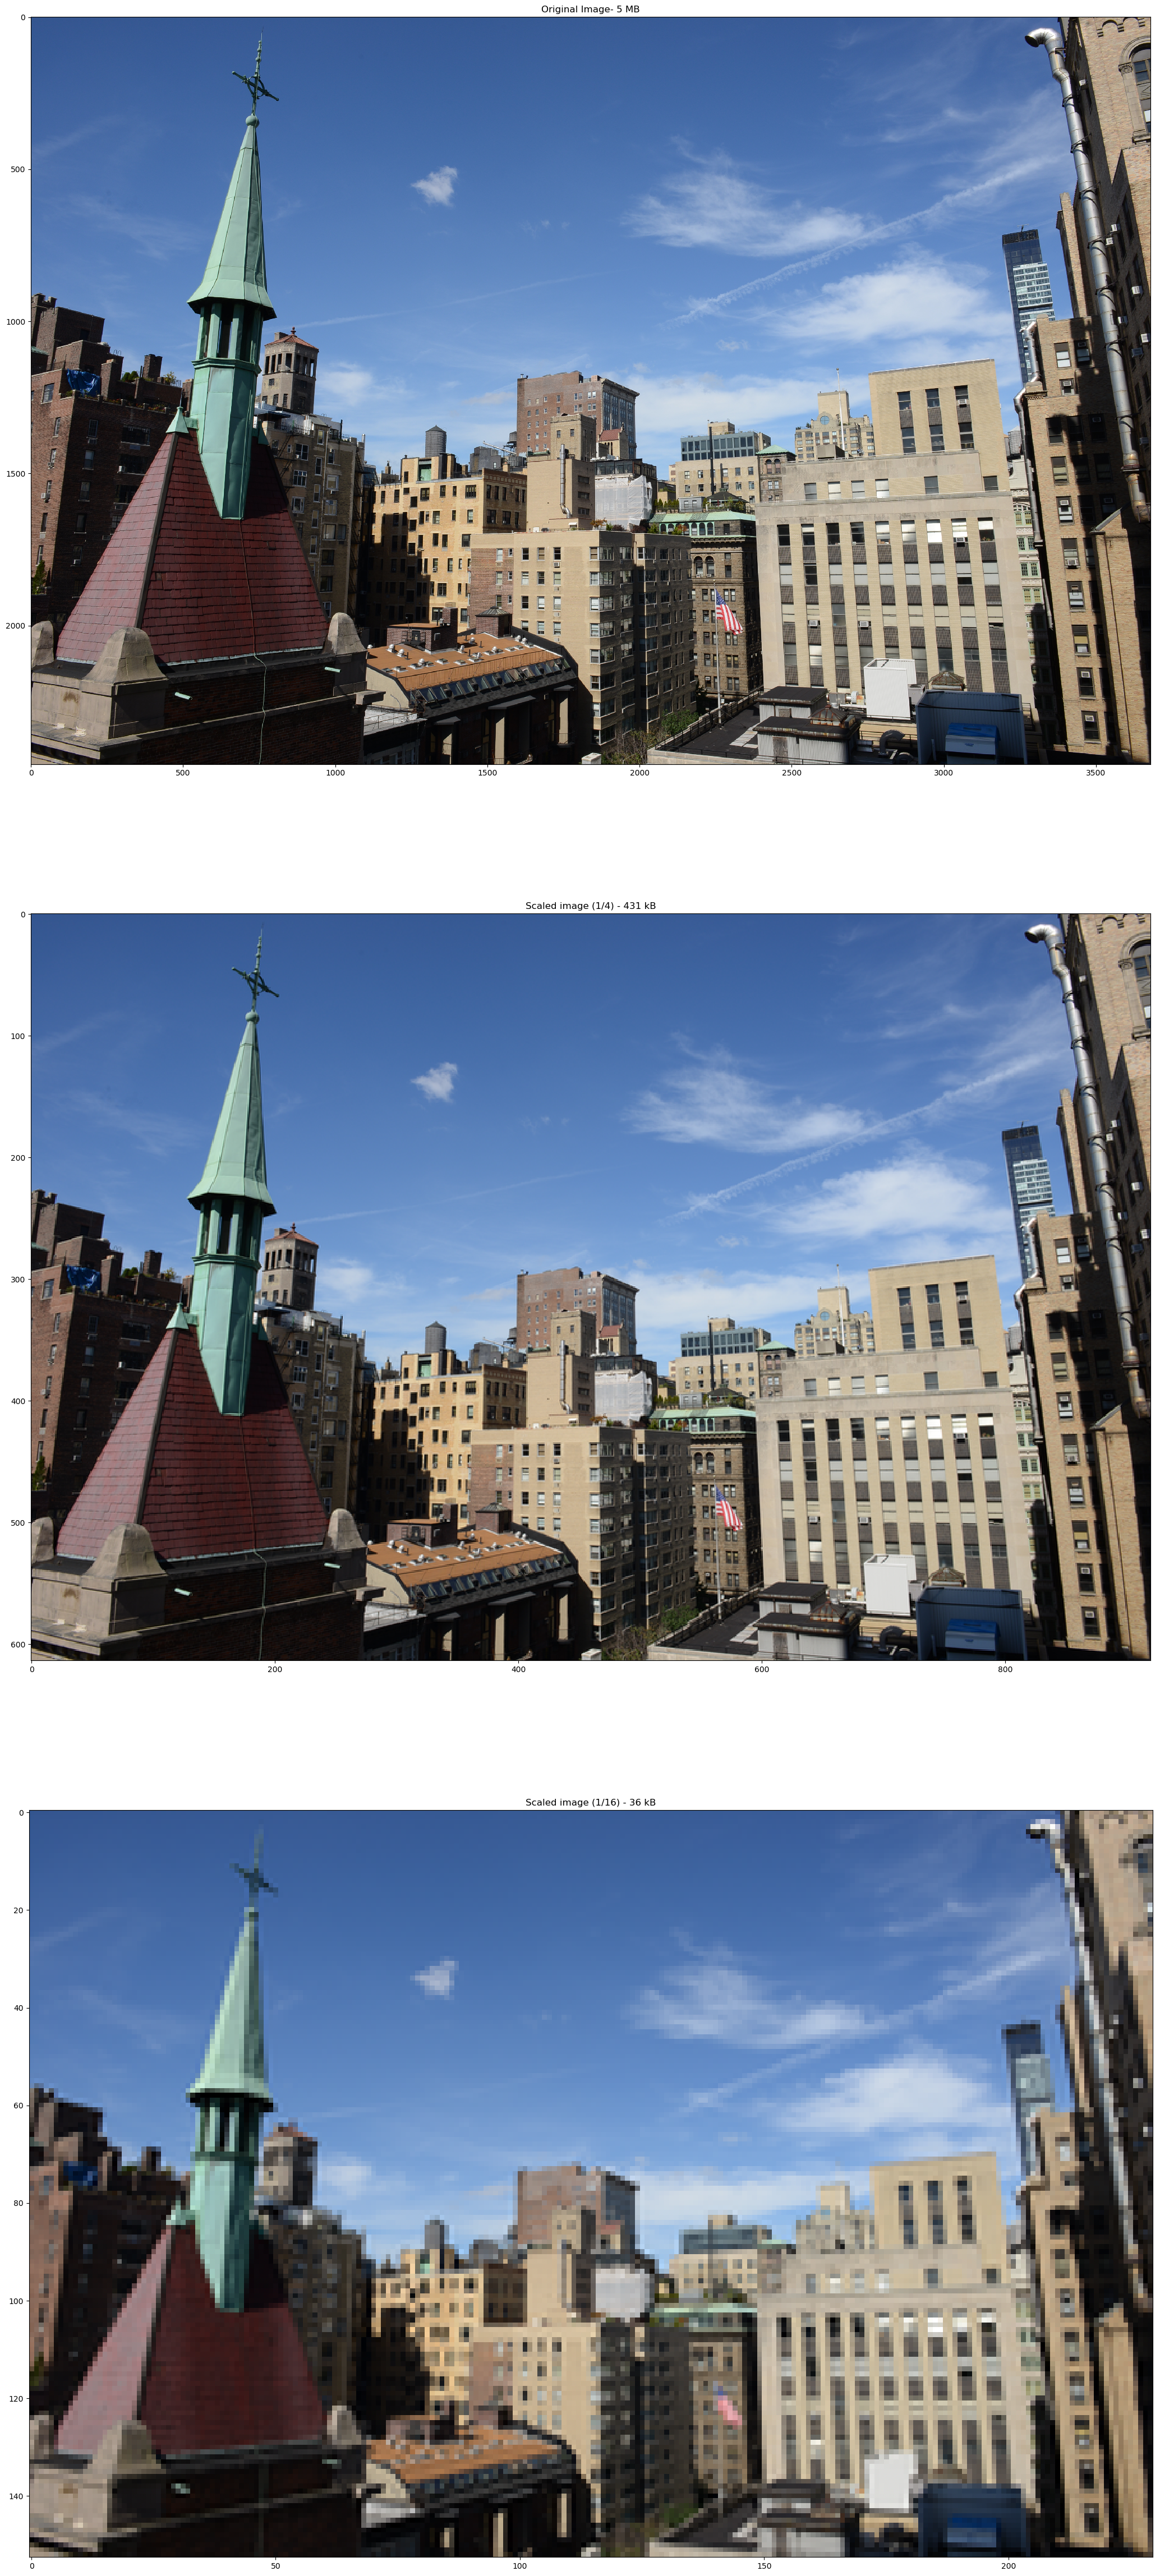

In [2]:
im = Image.open('../../files/img-serie-5/buildings.tiff', 'r')

bio = BytesIO()
im.save(bio, "JPEG", quality=100)
fsize = int(bio.getbuffer().nbytes / 1024 / 1024)

plt.figure(figsize=(30,60), dpi=100)
plt.subplot(3, 1, 1)
plt.imshow(np.asarray(im))
plt.title(f"Original Image- {fsize} MB")

width, height = im.size
size = (width/4, width/4)

bio = BytesIO()
im.thumbnail(size, Image.ANTIALIAS)
im.save(bio, "JPEG", quality=100)
fsize = int(bio.getbuffer().nbytes / 1024)
plt.subplot(3, 1, 2)
plt.title(f"Scaled image (1/4) - {fsize} kB")
plt.imshow(np.asarray(im))

size = (width/16, width/16)

bio = BytesIO()
im.thumbnail(size, Image.ANTIALIAS)
plt.subplot(3, 1, 3)
im.save(bio, "JPEG", quality=100)
fsize = int(bio.getbuffer().nbytes / 1024)
plt.title(f"Scaled image (1/16) - {fsize} kB")
plt.imshow(np.asarray(im))

Le immagini scalate sono più "pixellose", si può chiaramente notare una perdita di dettaglio nell'immagine. I colori sono però mantenuti.

### c.  
Le immagini scalate diventano più "pixxelose", mentre quelle con una qualità più bassa mostrano una compressione del colore notevole (mancanza di sfumature, colori "generalizzati"). Con un giusto compromesso fra qualità e dimensione, è possibile ridurre la dimensione dell'immagine originale senza impattare troppo sulla qualità generale dell'immagine (ad occhio umano).

## Esercizio 2 - Istogrammi

### a.

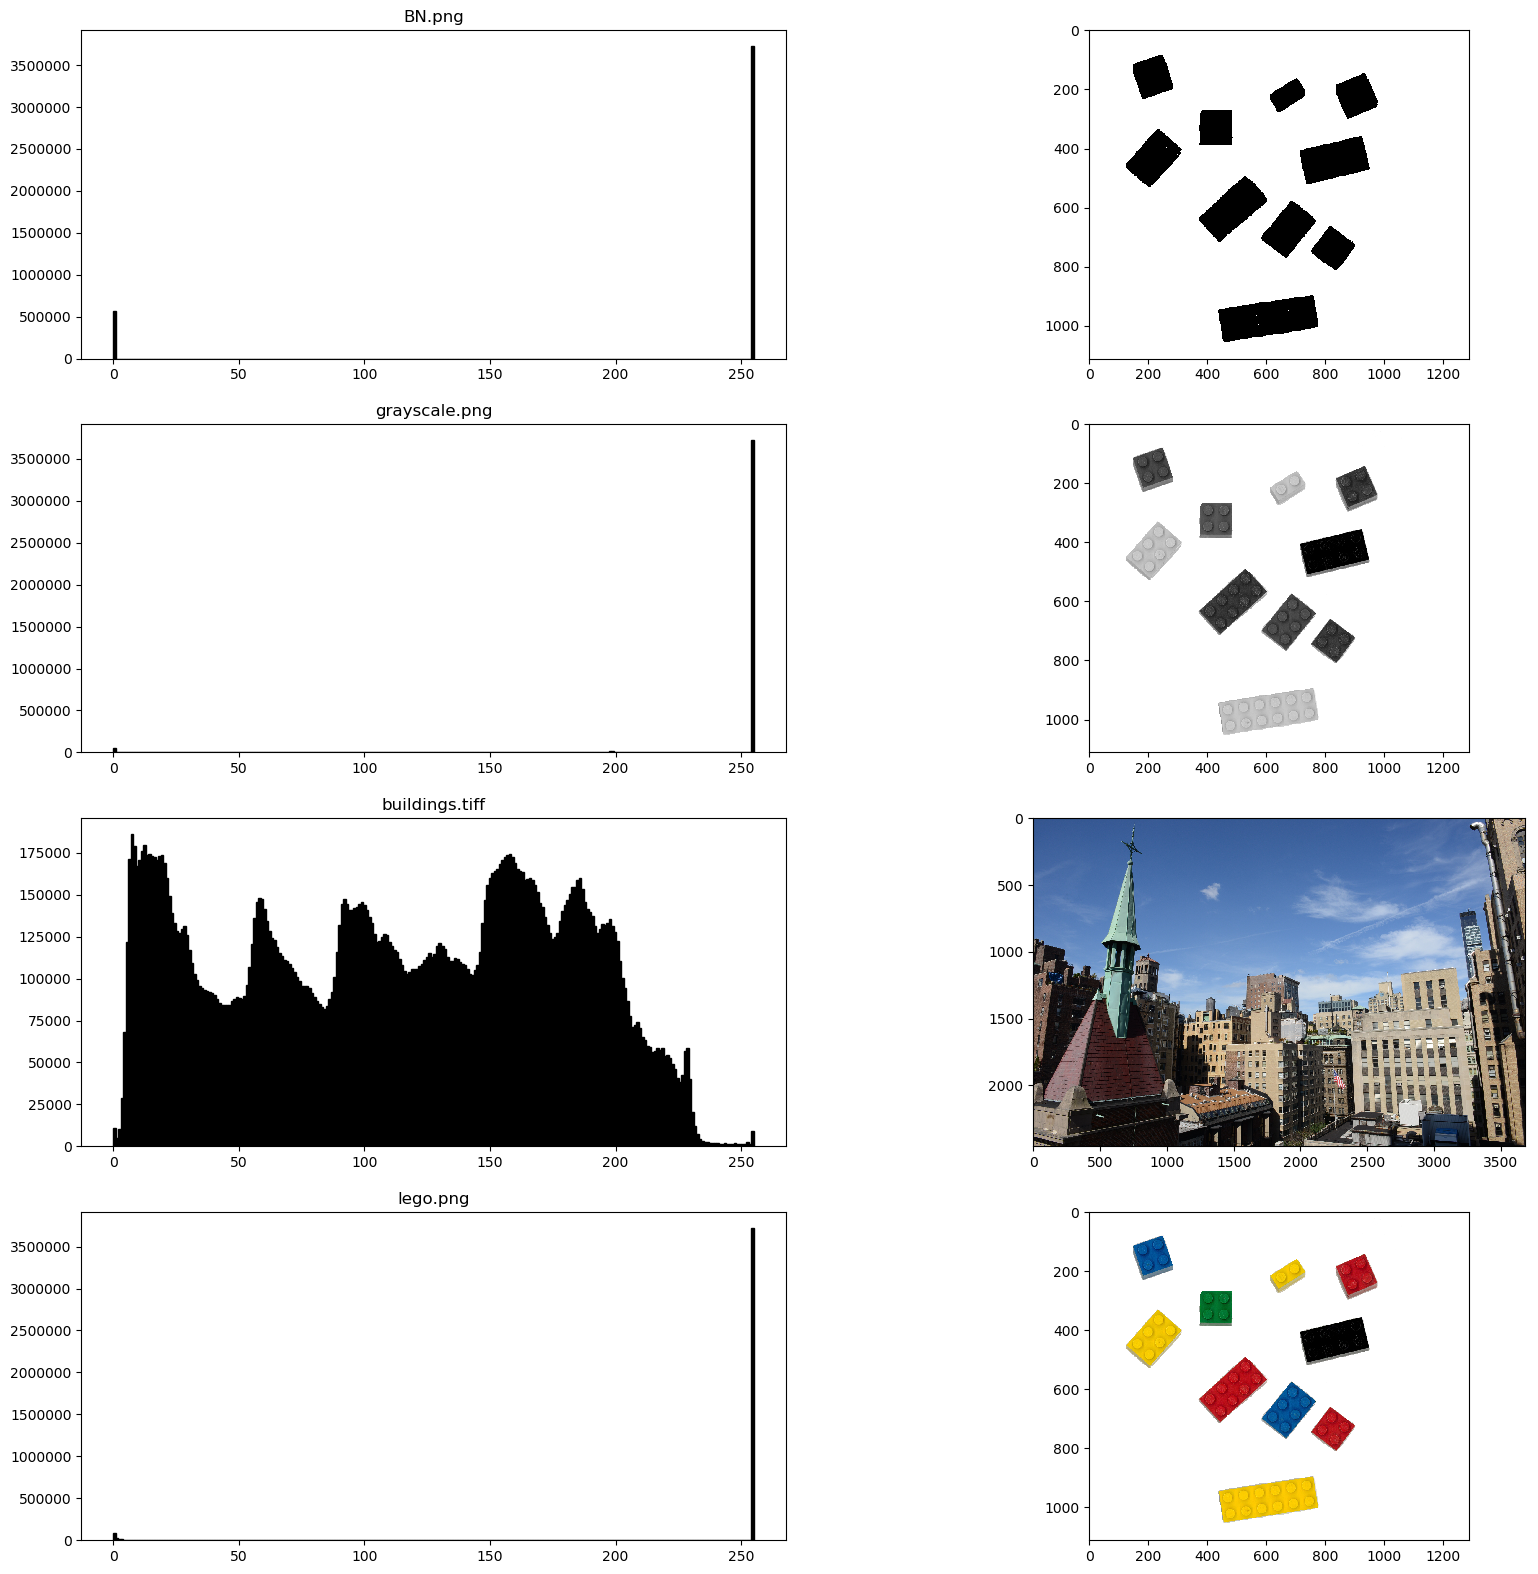

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def generate_gray_histogram(file):
    img = cv2.imread(file)
    #plt.hist(img.ravel(),256,[0,256])
    plt.hist(img.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
    path = file.split('/')
    plt.title(path[len(path)-1])
    return Image.open(file, 'r')
    
def generate_color_histogram(file):
    img = cv2.imread(file)
    color = ('b','g','r')
    plt.figure()
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    return Image.open(file, 'r')
        
plt.figure(figsize=(20,20), dpi=100)

files = ['../../files/img-serie-5/BN.png', '../../files/img-serie-5/grayscale.png', '../../files/img-serie-5/buildings.tiff', '../../files/img-serie-5/lego.png']

for idx, val in enumerate(files):
    plt.subplot(len(files), 2, idx * 2 + 1)
    img = generate_gray_histogram(val)
    plt.subplot(len(files), 2, idx * 2 + 2)
    plt.imshow(img);

plt.show()

Possiamo chiaramente notare come, per le prime due immagini, ci sia un picco di intensità in prossimità di 255 (bianco), ed una barra a zero (nero). Nel primo caso, per `BN.png`, abbiamo un valore elevato di nero, mentre per `grayscale.png` il valore di nero è nettamente inferirore. Analogamente per il confronto fra `buildings.tiff` e `lego.png`, possiamo notare che nella prima immagine le barre dell'istogramma sono tutte nello stesso range. Nel caso di `lego.png` invece, la maggior parte delle barre dell'istogramma sono nascoste in quanto l'immagine è prevalentemente bianca.

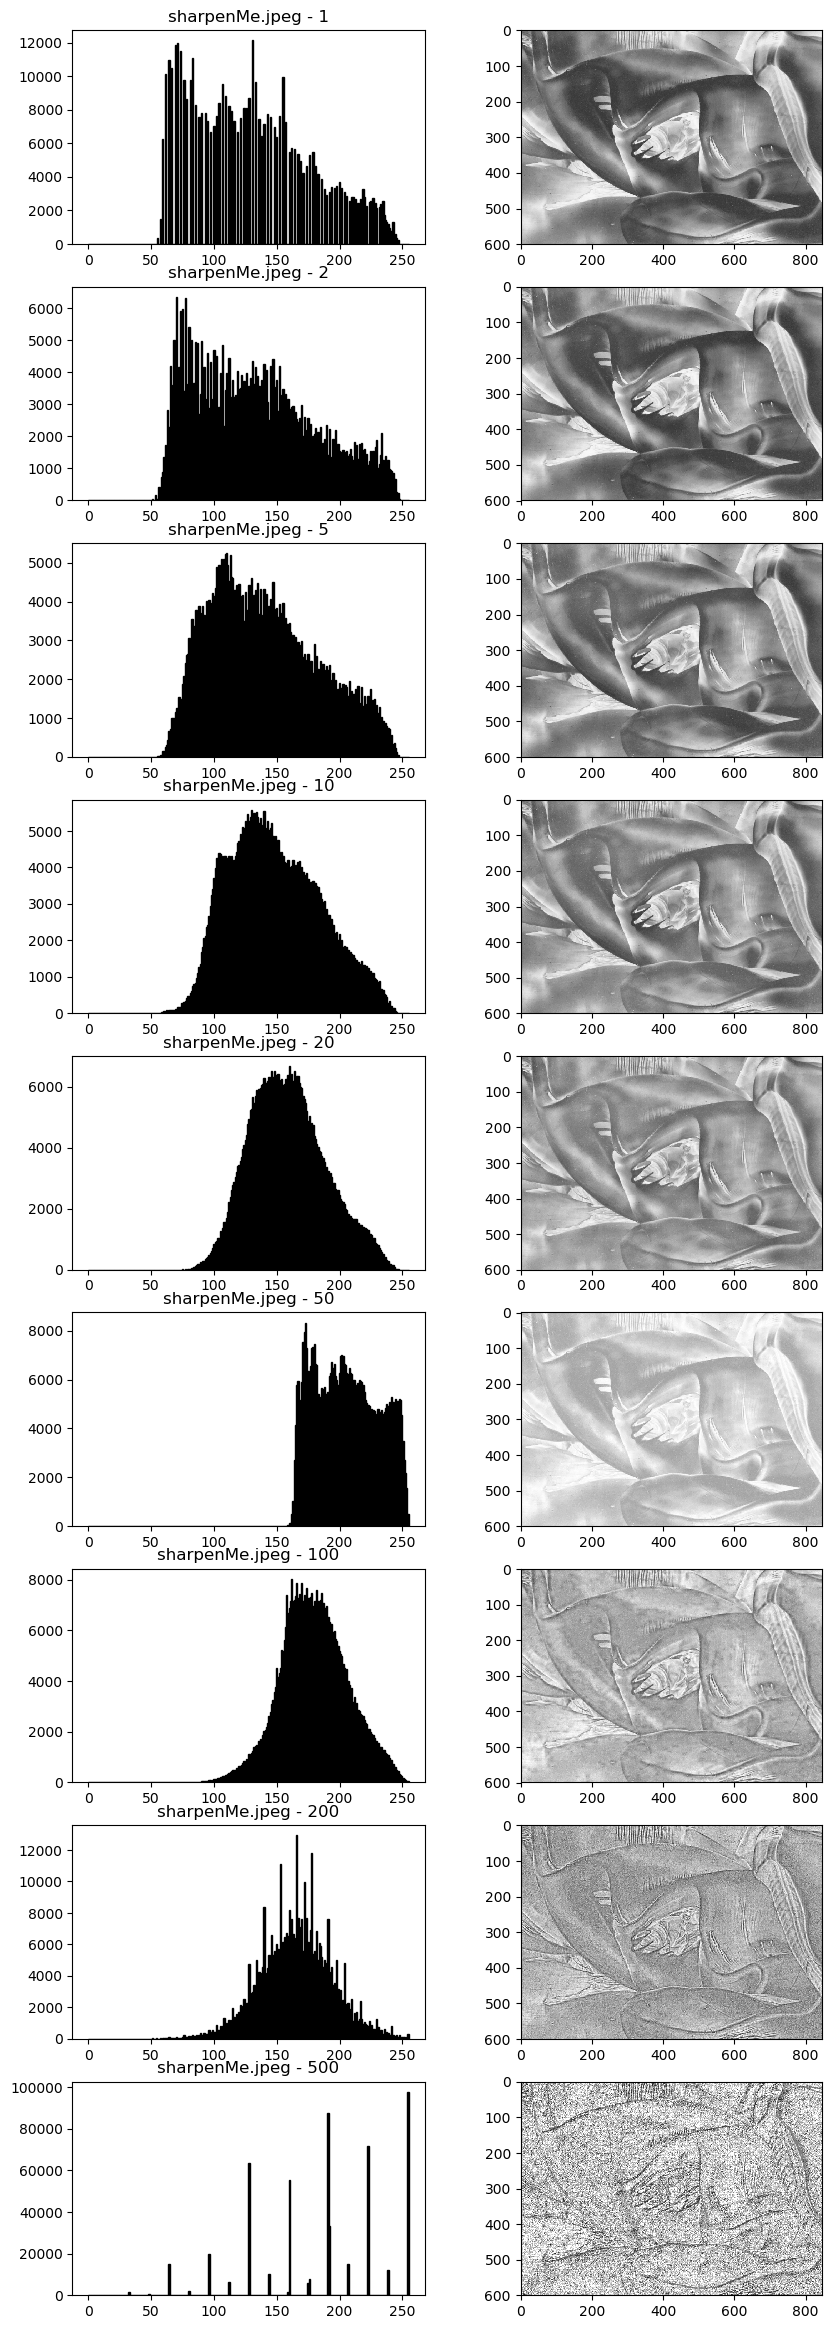

In [53]:
def generate_gray_histogram_contrast(file, contrast):
    img = cv2.imread(file)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(contrast, contrast))
    cl1 = clahe.apply(gray_image)
    plt.hist(cl1.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
    path = file.split('/')
    plt.title(f"{path[len(path)-1]} - {contrast}")
    return Image.fromarray(cl1)

plt.figure(figsize=(10,30), dpi=100)

file = '../../files/img-serie-5/sharpenMe.jpeg'
contrast = [1, 2, 5, 10, 20, 50, 100, 200, 500]

for idx, val in enumerate(contrast):
    plt.subplot(len(contrast), 2, idx * 2 + 1)
    img = generate_gray_histogram_contrast(file, val)
    plt.subplot(len(contrast), 2, idx * 2 + 2)
    plt.imshow(img);

plt.show()